# EDA : Lok Sabha Candidates, 2009 

## Extracting data

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate

year = 2009


def inr_to_int(text):
    try:
        text = text.split()
        text = text[1].replace(",", "")
    except:
        return 0
    return int(text)


def main():
    header = ["Candidate", "Party", "Criminal Cases", "Education", "Age", "Constituency",  "Total Assets", "Liabilities"]
    data = []
    constituencies = 0
    candidates = 0
    for i in range(1, 546):
        try:
            print("Trying ID", i, end = ' => ')
            url = "https://myneta.info/ls" + str(year) + "/index.php?action=show_candidates&constituency_id=" + str(i)
            html = urlopen(url)
            soup = BeautifulSoup(html,'html.parser')
            title = soup.title.text
            title = title.split()
            title = title[4:-3]
            title = " ".join(title)
            title = title.title()
            title = title.split(":")
            constituency = "+".join(title)
            title = ",".join(title)
            print("Saving", title, end = ' => ')
            table = soup.find("table", {"id": "table1"})
            rows = table.find_all('tr')
            total_rows = len(rows)
            for i in range(1, total_rows):
                col_data = []
                cols = rows[i].find_all('td')
                total_cols = len(cols)
                for i in range(0, 5):
                    col_data.append(cols[i].text)
                col_data.append(constituency)
                for i in range(5, total_cols):
                    col_data.append(inr_to_int(cols[i].text))                        
                data.append(col_data)
                candidates += 1
        except :
            print('ERROR')
        else:
            constituencies += 1
            print('SUCCESS')
    df = pd.DataFrame(data = data, columns = header)
    print('Saved =>', candidates, "candidates from", constituencies, "constituencies")
    df.to_csv(str(year) + '.csv', index=False)
    

main()

Trying ID 1 => Saving Adilabad , Andhra Pradesh => SUCCESS
Trying ID 2 => Saving Peddapalle , Andhra Pradesh => SUCCESS
Trying ID 3 => Saving Karimnagar , Andhra Pradesh => SUCCESS
Trying ID 4 => Saving Nizamabad , Andhra Pradesh => SUCCESS
Trying ID 5 => Saving Zahirabad , Andhra Pradesh => SUCCESS
Trying ID 6 => Saving Medak , Andhra Pradesh => SUCCESS
Trying ID 7 => Saving Malkajgiri , Andhra Pradesh => SUCCESS
Trying ID 8 => Saving Secunderabad , Andhra Pradesh => SUCCESS
Trying ID 9 => Saving Hyderabad , Andhra Pradesh => SUCCESS
Trying ID 10 => Saving Chevella , Andhra Pradesh => SUCCESS
Trying ID 11 => Saving Mahbubnagar , Andhra Pradesh => SUCCESS
Trying ID 12 => Saving Nagarkurnool , Andhra Pradesh => SUCCESS
Trying ID 13 => Saving Nalgonda , Andhra Pradesh => SUCCESS
Trying ID 14 => Saving Bhongir , Andhra Pradesh => SUCCESS
Trying ID 15 => Saving Warangal , Andhra Pradesh => SUCCESS
Trying ID 16 => Saving Mahabubabad , Andhra Pradesh => SUCCESS
Trying ID 17 => Saving Khammam

Trying ID 145 => Saving Narsapuram , Andhra Pradesh => SUCCESS
Trying ID 146 => Saving Eluru , Andhra Pradesh => SUCCESS
Trying ID 147 => Saving Machilipatnam , Andhra Pradesh => SUCCESS
Trying ID 148 => Saving Vijayawada , Andhra Pradesh => SUCCESS
Trying ID 149 => Saving Guntur , Andhra Pradesh => SUCCESS
Trying ID 150 => Saving Narasaraopet , Andhra Pradesh => SUCCESS
Trying ID 151 => Saving Bapatla , Andhra Pradesh => SUCCESS
Trying ID 152 => Saving Ongole , Andhra Pradesh => SUCCESS
Trying ID 153 => Saving Nandyal , Andhra Pradesh => SUCCESS
Trying ID 154 => Saving Kurnool , Andhra Pradesh => SUCCESS
Trying ID 155 => Saving Anantapur , Andhra Pradesh => SUCCESS
Trying ID 156 => Saving Hindupur , Andhra Pradesh => SUCCESS
Trying ID 157 => Saving Kadapa , Andhra Pradesh => SUCCESS
Trying ID 158 => Saving Nellore , Andhra Pradesh => SUCCESS
Trying ID 159 => Saving Tirupati , Andhra Pradesh => SUCCESS
Trying ID 160 => Saving Rajampet , Andhra Pradesh => SUCCESS
Trying ID 161 => Saving

Trying ID 289 => Saving Surat , Gujarat => SUCCESS
Trying ID 290 => Saving Navsari , Gujarat => SUCCESS
Trying ID 291 => Saving Valsad , Gujarat => SUCCESS
Trying ID 292 => Saving Bagalkot , Karnataka => SUCCESS
Trying ID 293 => Saving Haveri , Karnataka => SUCCESS
Trying ID 294 => Saving Dharwad , Karnataka => SUCCESS
Trying ID 295 => Saving Davanagere , Karnataka => SUCCESS
Trying ID 296 => Saving Shimoga , Karnataka => SUCCESS
Trying ID 297 => Saving Udupi Chikmagalur , Karnataka => SUCCESS
Trying ID 298 => Saving Hassan , Karnataka => SUCCESS
Trying ID 299 => Saving Dakshina Kannada , Karnataka => SUCCESS
Trying ID 300 => Saving Mandya , Karnataka => SUCCESS
Trying ID 301 => Saving Mysore , Karnataka => SUCCESS
Trying ID 302 => Saving Chamarajanagar , Karnataka => SUCCESS
Trying ID 303 => Saving Supaul , Bihar => SUCCESS
Trying ID 304 => Saving Araria , Bihar => SUCCESS
Trying ID 305 => Saving Kishanganj , Bihar => SUCCESS
Trying ID 306 => Saving Katihar , Bihar => SUCCESS
Trying I

Trying ID 431 => Saving Farrukhabad , Uttar Pradesh => SUCCESS
Trying ID 432 => Saving Etawah , Uttar Pradesh => SUCCESS
Trying ID 433 => Saving Kannauj , Uttar Pradesh => SUCCESS
Trying ID 434 => Saving Jangipur , West Bengal => SUCCESS
Trying ID 435 => Saving Baharampur , West Bengal => SUCCESS
Trying ID 436 => Saving Murshidabad , West Bengal => SUCCESS
Trying ID 437 => Saving Krishnanagar , West Bengal => SUCCESS
Trying ID 438 => Saving Ranaghat , West Bengal => SUCCESS
Trying ID 439 => Saving Howrah , West Bengal => SUCCESS
Trying ID 440 => Saving Uluberia , West Bengal => SUCCESS
Trying ID 441 => Saving Sreerampur , West Bengal => SUCCESS
Trying ID 442 => Saving Hooghly , West Bengal => SUCCESS
Trying ID 443 => Saving Arambag , West Bengal => SUCCESS
Trying ID 444 => Saving Tamluk , West Bengal => SUCCESS
Trying ID 445 => Saving Kanthi , West Bengal => SUCCESS
Trying ID 446 => Saving Bardhaman Purba , West Bengal => SUCCESS
Trying ID 447 => Saving Bardhaman-Durgapur , West Bengal

## Visualizing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rc('figure', figsize=(10, 5))
matplotlib.rc('font', weight='bold', size=12)

In [3]:
data = pd.read_csv(str(year) + '.csv')
data

Candidate       Party  Criminal Cases      Education  Age  \
0     Ramesh Rathod   Winner          TDP               2      12th Pass   43   
1                A Laxman Rao         IND               0      10th Pass   47   
2                 Ade Tukaram         BJP               0      10th Pass   55   
3               Banka Sahadev         IND               0      Not Given   56   
4                  G Pentanna         IND               0  Post Graduate   36   
...                       ...         ...             ...            ...  ...   
7615         PRADEEP ANIRUDDH        PPOI               0  Post Graduate   29   
7616              RAMADASS. M         PMK               0      Doctorate   54   
7617       S. BALASUBRAMANIAN  CPI(ML)(L)               0       Graduate   50   
7618     Raj Babbar   Winner          INC               2       Graduate   58   
7619   PUTUL KUMARI   Winner          IND               0  Post Graduate   50   

                                           Constituency  Total Assets  \
0                             Adilabad + Andhra Pradesh       3410000   
1                             Adilabad + Andhra Pradesh       1560000   
2                             Adilabad + Andhra Pradesh        865000   
3                             Adilabad + Andhra Pradesh        118000   
4                             Adilabad + Andhra Pradesh        436000   
...                                                 ...           ...   
7615                           Pondicherry + Puducherry        788000   
7616                           Pondicherry + Puducherry       3217000   
7617                           Pondicherry + Puducherry        322591   
7618  Firozabad (Bye-Election On 7-11-2009) + Uttar ...     117051305   
7619         Banka (Bye-Election On 24-06-2010) + Bihar      32320408   

      Liabilities  
0          815241  
1               0  
2          370000  
3               0  
4           13000  
...           ...  
7615       140000  
7616       246552  
7617        94922  
7618     16646383  
7619      1883186  

[7620 rows x 8 columns]

In [4]:
data.describe()

Criminal Cases          Age  Total Assets   Liabilities
count     7620.000000  7620.000000  7.620000e+03  7.620000e+03
mean         0.379265    45.919160  1.738637e+07  7.780760e+05
std          1.676561    11.879233  2.623992e+08  7.526980e+06
min          0.000000     0.000000  0.000000e+00  0.000000e+00
25%          0.000000    36.000000  1.470000e+05  0.000000e+00
50%          0.000000    45.000000  9.377850e+05  0.000000e+00
75%          0.000000    55.000000  4.817459e+06  8.500000e+04
max         46.000000    88.000000  1.977525e+10  3.758160e+08

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       7620 non-null   object
 1   Party           7620 non-null   object
 2   Criminal Cases  7620 non-null   int64 
 3   Education       7620 non-null   object
 4   Age             7620 non-null   int64 
 5   Constituency    7620 non-null   object
 6   Total Assets    7620 non-null   int64 
 7   Liabilities     7620 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 476.4+ KB


In [6]:
# Total number of Parties
np.size(data["Party"].unique()) - 1
# Reducing by one for independent candidates

357

In [7]:
candidates = np.size(data["Candidate"])
candidates

7620

In [8]:
candidates - np.size(data["Candidate"].unique())

272

In [9]:
candidates - data.groupby(['Candidate', 'Party']).ngroups

102

In [10]:
candidates - data.groupby(['Candidate', 'Constituency']).ngroups

3

In [11]:
data.groupby(['Candidate', 'Education'])['Total Assets'].sum().sort_values(ascending=False).head(25)

Candidate                         Education            
MOHANRAJ J                        Graduate                 19775251000
V. M. SINGH                       Graduate                  6321566925
DEEPAK BHARDWAJ                   Graduate                  6038347375
KHIMJIBHAI HARJIVANBHAI PATADIYA  10th Pass                 5149727807
Nama Nageswara Rao   Winner       12th Pass                 1737508117
KANWAR SINGH TANWAR               5th Pass                  1549977275
SUBHASH TIPPANNA NELGE            10th Pass                 1496078273
NAVEEN JINDAL   Winner            Post Graduate             1310730000
ABU ASIM AZMI                     Graduate                  1247388991
L Rajagopal   Winner              Graduate Professional     1222964909
BALASHOWRY VALLABHANENI           Graduate                  1219428113
Surendra Babu. R.                 Post Graduate             1075502000
JITENDRA RAGHURAJ DESHPRABHU      Graduate                  1063063407
MALOOK NAGAR         

In [12]:
data.groupby(['Candidate', 'Education'])['Liabilities'].sum().sort_values(ascending=False).head(25)

Candidate                              Education            
D.A. SRINIVAS                          Graduate Professional    375816032
H D KUMARA SWAMY   Winner              Graduate                 336237223
PANSARE AZAM FAKEERBHAI                12th Pass                188834789
Mallikarjun.S.S                        Graduate                 138105045
MICHAEL RAYAPPAN S                     12th Pass                113618441
SUBHASH TIPPANNA NELGE                 10th Pass                109491079
C.R.MANOHAR                            Graduate                  89446460
ALAGIRI S   Winner                     Graduate                  78136525
SHEKHAR SUMAN                          Graduate                  75384735
DATTA MEGHE   Winner                   Graduate                  70008871
Y.S. Jagan Mohan Reddy   Winner        Graduate                  66396966
VILAS VITHOBA LANDE                    5th Pass                  61821809
DR.LAVU RATHAIAH                       Doctorate   

In [13]:
party_data = data[data["Party"].isin(["AAP","SAD","BSP","BJP","INC","IND","Republican Party of India (A)", "Punjab Lok Congress Party"])]
party_data.reset_index()
party_data

Candidate Party  Criminal Cases      Education  Age  \
1               A Laxman Rao   IND               0      10th Pass   47   
2                Ade Tukaram   BJP               0      10th Pass   55   
3              Banka Sahadev   IND               0      Not Given   56   
4                 G Pentanna   IND               0  Post Graduate   36   
5              Kotnak Ramesh   INC               0      12th Pass   39   
...                      ...   ...             ...            ...  ...   
7611  NARAYANASAMY   Winner    INC               0  Post Graduate   61   
7612        DR. R. NARAYANAN   IND               0      Doctorate   59   
7613         G. SUBRAMANIYAN   IND               0       Graduate   36   
7618    Raj Babbar   Winner    INC               2       Graduate   58   
7619  PUTUL KUMARI   Winner    IND               0  Post Graduate   50   

                                           Constituency  Total Assets  \
1                             Adilabad + Andhra Pradesh       1560000   
2                             Adilabad + Andhra Pradesh        865000   
3                             Adilabad + Andhra Pradesh        118000   
4                             Adilabad + Andhra Pradesh        436000   
5                             Adilabad + Andhra Pradesh       2600000   
...                                                 ...           ...   
7611                           Pondicherry + Puducherry      35979157   
7612                           Pondicherry + Puducherry       1080000   
7613                           Pondicherry + Puducherry           585   
7618  Firozabad (Bye-Election On 7-11-2009) + Uttar ...     117051305   
7619         Banka (Bye-Election On 24-06-2010) + Bihar      32320408   

      Liabilities  
1               0  
2          370000  
3               0  
4           13000  
5               0  
...           ...  
7611      2171758  
7612            0  
7613            0  
7618     16646383  
7619      1883186  

[4895 rows x 8 columns]

In [14]:
party_sorted = party_data[["Party","Candidate"]].groupby(["Party"]).aggregate(lambda x: len(x.unique())).sort_values(["Candidate"], ascending = False )
party_sorted

Candidate
Party           
IND         3502
BSP          471
BJP          409
INC          408
SAD           10

<AxesSubplot:xlabel='Party'>

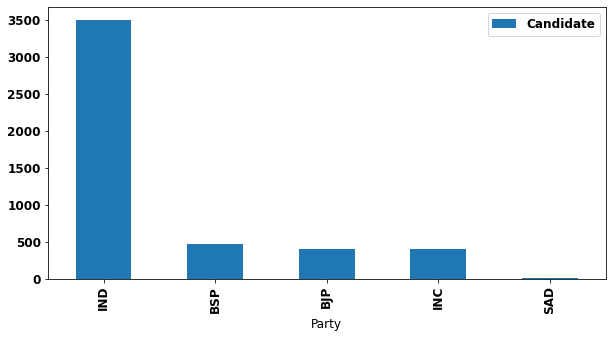

In [15]:
party_sorted.plot(kind="bar")

<AxesSubplot:xlabel='Education'>

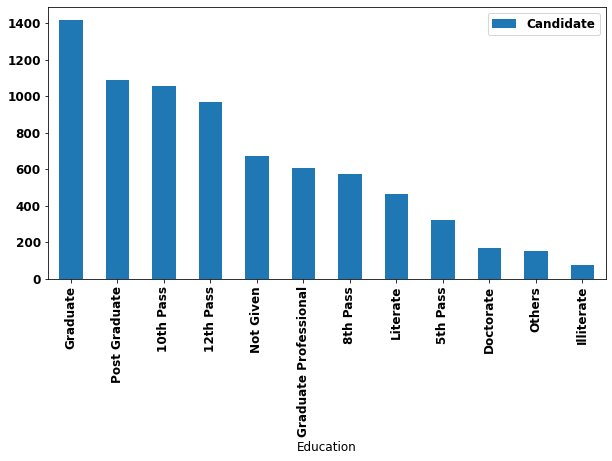

In [16]:
ed_data = pd.pivot_table(data,values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"]).sort_values(["Candidate"], ascending = False )
ed_data.reset_index()
ed_data.plot(kind="bar")

In [17]:
ed_party_data = pd.pivot_table(party_data, values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"], columns=["Party"])
ed_party_data.fillna(0)

Candidate                          
Party                       BJP    BSP    INC    IND  SAD
Education                                                
10th Pass                  38.0   44.0   25.0  581.0  2.0
12th Pass                  41.0   61.0   43.0  454.0  2.0
5th Pass                    4.0   12.0    4.0  215.0  0.0
8th Pass                    9.0   27.0    9.0  332.0  0.0
Doctorate                  16.0    8.0   29.0   45.0  1.0
Graduate                  108.0  120.0  110.0  571.0  1.0
Graduate Professional      68.0   59.0   72.0  187.0  2.0
Illiterate                  0.0    0.0    0.0   55.0  0.0
Literate                    3.0   13.0    2.0  297.0  0.0
Not Given                  13.0   35.0    4.0  396.0  0.0
Others                      6.0    8.0    5.0   70.0  0.0
Post Graduate             103.0   84.0  105.0  374.0  2.0

In [18]:
criminal_data_asc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=False).head(25)
criminal_data_asc = criminal_data_asc.reset_index(drop=True)
criminal_data_asc

Candidate  \
0                          KAMESHWAR BAITHA   Winner    
1                                             JAWAHIR   
2                                             RAYAR K   
3                                   VINOD KUMAR PITTI   
4                    AHIR HANSARAJ GANGARAM   Winner    
5                   NIHAL AHMED MOLVI. MOHAMMED USMAN   
6                                      AKhilesh Singh   
7                                      DINESH RATHOUR   
8                                    RAM NANDAN YADAV   
9                                            MITRASEN   
10                                RANVEER SINGH GUDHA   
11                                          RAMDARASH   
12                               M B Rajesh   Winner    
13         VITTHALBHAI HANSRAJBHAI RADADIYA   Winner    
14                                 VIJAY KUMAR SHUKLA   
15                       CHANDRAKANT KHAIRE   Winner    
16                                     SAMARESH SINGH   
17                       N Chaluvarayaswamy   Winner    
18                                       SANJAY YADAV   
19  BHONSLE SHRIMANT CHH. UDYANRAJE PRATAPSINH   W...   
20                                       KISHOR KUMAR   
21                                        PAWAN DUGAL   
22                     CHHOTUBHAI AMARSINHBHAI VASAVA   
23                       Tathagata Satpathy   Winner    
24                                          AnilMehta   

                 Constituency       Party      Education  Criminal Cases  
0         Palamau + Jharkhand         JMM      10th Pass              46  
1   Chandauli + Uttar Pradesh        PMSP       Literate              44  
2      Cuddalore + Tamil Nadu         IND      Doctorate              33  
3          Nagaur + Rajasthan         IND       Graduate              30  
4    Chandrapur + Maharashtra         BJP      10th Pass              30  
5         Dhule + Maharashtra       JD(S)      10th Pass              30  
6              Nawada + Bihar         IND      10th Pass              27  
7              Araria + Bihar         IND       Literate              22  
8            Khagaria + Bihar         IND       Literate              20  
9    Faizabad + Uttar Pradesh          SP      12th Pass              19  
10      Jhunjhunu + Rajasthan         LJP       Graduate              17  
11      Kheri + Uttar Pradesh  CPI(ML)(L)       8th Pass              17  
12          Palakkad + Kerala         CPM  Post Graduate              16  
13        Porbandar + Gujarat         INC       Graduate              16  
14           Vaishali + Bihar       JD(U)  Post Graduate              16  
15   Aurangabad + Maharashtra         SHS      12th Pass              16  
16        Dhanbad + Jharkhand         BSP      12th Pass              15  
17         Mandya + Karnataka       JD(S)      12th Pass              15  
18           Khagaria + Bihar         IND       Literate              15  
19       Satara + Maharashtra         NCP         Others              14  
20          Madhepura + Bihar         IND       Graduate              14  
21        Bikaner + Rajasthan         CPM       Graduate              13  
22          Bharuch + Gujarat       JD(U)      10th Pass              13  
23         Dhenkanal + Orissa         BJD      12th Pass              13  
24             Nawada + Bihar         IND       Graduate              12

In [19]:
criminal_data_dsc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=True).head(25)
criminal_data_dsc = criminal_data_dsc.reset_index(drop=True)
criminal_data_dsc

Candidate             Constituency          Party  \
0   PYARELAL BUDDHURAM BHARTI          Surat + Gujarat            IND   
1               Ashwini Duley    Bankura + West Bengal         JKP(N)   
2   Acharia Basudeb   Winner     Bankura + West Bengal            CPM   
3            Umacharan Mahato    Purulia + West Bengal            IND   
4               Sayantan Basu    Purulia + West Bengal            BJP   
5                 Mukesh Sahu    Purulia + West Bengal            IND   
6           Mrityunjay Mahato    Purulia + West Bengal            IND   
7                Dhiren Rajak    Purulia + West Bengal            IND   
8               Bisambar Mura    Purulia + West Bengal            IND   
9           Asit Baran Mahato    Purulia + West Bengal            BSP   
10        Amulya Ratan Mahato    Purulia + West Bengal            IND   
11              Abinash Saren    Purulia + West Bengal  Amra Bangalee   
12              Abhiram Besra    Purulia + West Bengal            JDP   
13  Narahari Mahato   Winner     Purulia + West Bengal           AIFB   
14              Sanjay Mishra  Medinipur + West Bengal            IND   
15              Partha Addhya  Medinipur + West Bengal            IND   
16                  Nepal Das  Medinipur + West Bengal            JMM   
17          Mukul Kumar Maiti  Medinipur + West Bengal           RDMP   
18                 De Sukumar  Medinipur + West Bengal            IND   
19          Asok Kumar Golder  Medinipur + West Bengal            BSP   
20                Amit Moitra  Medinipur + West Bengal            IND   
21    Prabodh Panda   Winner   Medinipur + West Bengal            CPI   
22                Susil Mandi   Jhargram + West Bengal            IND   
23                Sunil Murmu   Jhargram + West Bengal            IND   
24       Byasdeb Chakrabortty    Bankura + West Bengal          JD(U)   

                Education  Criminal Cases  
0               12th Pass               0  
1                8th Pass               0  
2           Post Graduate               0  
3                Literate               0  
4                Graduate               0  
5               12th Pass               0  
6           Post Graduate               0  
7                8th Pass               0  
8           Post Graduate               0  
9               10th Pass               0  
10               Graduate               0  
11               Graduate               0  
12              10th Pass               0  
13          Post Graduate               0  
14              10th Pass               0  
15               Graduate               0  
16              12th Pass               0  
17              12th Pass               0  
18  Graduate Professional               0  
19               Graduate               0  
20          Post Graduate               0  
21               Graduate               0  
22               Graduate               0  
23               8th Pass               0  
24          Post Graduate               0

<AxesSubplot:xlabel='Party'>

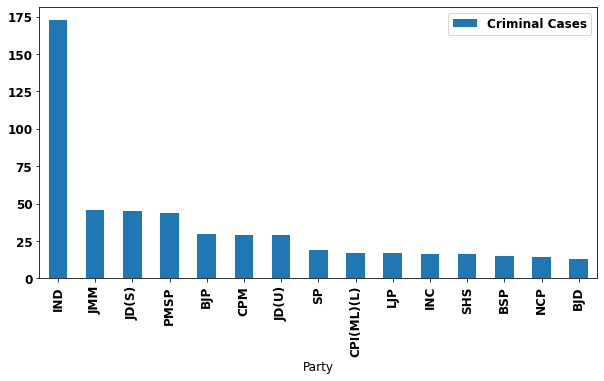

In [20]:
criminal_data_asc.groupby("Party").aggregate(np.sum).sort_values("Criminal Cases",ascending=False).head(25).plot(kind='bar') 

In [21]:
asset_data = data[["Candidate","Constituency","Party", "Total Assets"]].sort_values('Total Assets', ascending=False).head(25)
asset_data = asset_data.reset_index(drop=True)
asset_data

Candidate  \
0                         MOHANRAJ J   
1                        V. M. SINGH   
2                    DEEPAK BHARDWAJ   
3   KHIMJIBHAI HARJIVANBHAI PATADIYA   
4       Nama Nageswara Rao   Winner    
5                KANWAR SINGH TANWAR   
6             SUBHASH TIPPANNA NELGE   
7            NAVEEN JINDAL   Winner    
8                      ABU ASIM AZMI   
9              L Rajagopal   Winner    
10           BALASHOWRY VALLABHANENI   
11                 Surendra Babu. R.   
12      JITENDRA RAGHURAJ DESHPRABHU   
13                      MALOOK NAGAR   
14                 DR SATDEVA CHADDA   
15       Dr. G. Vivekanand   Winner    
16  Y.S. Jagan Mohan Reddy   Winner    
17   RAJKUMARI RATNA SINGH   Winner    
18                     D.A. SRINIVAS   
19                 CAPT.G.R.GOPINATH   
20                   BEST S.RAMASAMY   
21           MOHD. SHEAR NABI CHAMAN   
22          HARSIMRAT KAUR   Winner    
23             SARUBALA.R.THONDAIMAN   
24                  MONI KUMAR SUBBA   

                                         Constituency  Party  Total Assets  
0                          Chennai South + Tamil Nadu     JJ   19775251000  
1                            Pilibhit + Uttar Pradesh    INC    6321566925  
2    West Delhi + National Capital Territory Of Delhi    BSP    6038347375  
3                             Surendranagar + Gujarat  KKJHS    5149727807  
4                            Khammam + Andhra Pradesh    TDP    1737508117  
5   South Delhi + National Capital Territory Of Delhi    BSP    1549977275  
6                                   Bidar + Karnataka  JD(S)    1496078273  
7                               Kurukshetra + Haryana    INC    1310730000  
8                     Mumbai North West + Maharashtra     SP    1247388991  
9                         Vijayawada + Andhra Pradesh    INC    1222964909  
10                      Narasaraopet + Andhra Pradesh    INC    1219428113  
11                        Bangalore North + Karnataka  JD(S)    1075502000  
12                                    North Goa + Goa    NCP    1063063407  
13                             Meerut + Uttar Pradesh    BSP     853165000  
14                                 Jaipur + Rajasthan    IND     844386000  
15                        Peddapalle + Andhra Pradesh    INC     729509675  
16                            Kadapa + Andhra Pradesh    INC     728151658  
17                         Pratapgarh + Uttar Pradesh    INC     678270725  
18                          Rajampet + Andhra Pradesh   PRAP     670119543  
19                        Bangalore South + Karnataka    IND     668963000  
20                              Pollachi + Tamil Nadu   KNMK     661532601  
21  North East Delhi + National Capital Territory ...    IND     611880000  
22                                  Bathinda + Punjab    SAD     603100135  
23                       Tiruchirappalli + Tamil Nadu    INC     586236259  
24                                     Tezpur + Assam    INC     578758296

<AxesSubplot:xlabel='Party'>

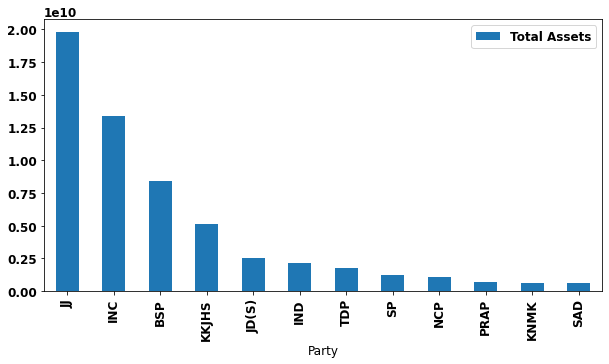

In [22]:
asset_data.groupby("Party").aggregate(np.sum).sort_values("Total Assets",ascending=False).head(25).plot(kind='bar') 